In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

In [92]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [5]:
data = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]

In [6]:
df = pd.DataFrame(data)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [7]:
df = pd.DataFrame(data, index = ['A', 'B', 'C'], columns = ['first', 'second', 'third'])
print(df)

   first  second  third
A      1       2      3
B      4       5      6
C      7       8      9


In [8]:
df = pd.read_csv('./train.csv')
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [9]:
df.head(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print(df.size)

10692


In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df['Sex'].nunique()

2

In [14]:
df['Pclass'].nunique()

3

In [15]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
df['Name'].nunique()

891

In [18]:
df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [19]:
df.loc[[753],['Sex']]

,Sex
753,male


In [20]:
df.iloc[1:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [21]:
df.iloc[1, 4]

'female'

In [22]:
df.iloc[1, 4:7]

Sex      female
Age          38
SibSp         1
Name: 1, dtype: object

In [23]:
df.iloc[1:4, 1:7]

,Survived,Pclass,Name,Sex,Age,SibSp
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1


In [24]:
print(df[df.Age < 20])

     PassengerId  Survived  Pclass                                  Name  \
7              8         0       3        Palsson, Master. Gosta Leonard   
9             10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3       Sandstrom, Miss. Marguerite Rut   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                  Rice, Master. Eugene   
..           ...       ...     ...                                   ...   
855          856         1       3            Aks, Mrs. Sam (Leah Rosen)   
869          870         1       3       Johnson, Master. Harold Theodor   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   
877          878         0       3                  Petroff, Mr. Nedelio   
887          888         1       1          Graham, Miss. Margaret Edith   

        Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
7      male   2.0   

In [25]:
under20 = (df[df.Age < 20][['Sex', 'Survived']])

In [26]:
under20['Survived'].value_counts()

0    85
1    79
Name: Survived, dtype: int64

In [27]:
df['Age'].mean()

29.69911764705882

In [28]:
df.drop(['Fare'], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C148,C


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df2 = df.dropna()
df2.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                   

In [32]:
df.groupby(['Sex'])['Age'].agg(np.mean)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [1]:
df.['Age']

SyntaxError: invalid syntax (<ipython-input-1-fff01ea55918>, line 1)

### HEADER

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = df[['Survived']]

In [21]:
X = pd.get_dummies(X)

In [22]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
X.Age.median()

28.0

In [28]:
X = X.fillna({'Age': X.Age.median()})

In [29]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
clf.fit(X, y)

DecisionTreeClassifier()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [40]:
X_test.shape

(295, 10)

In [54]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [55]:
clf.score(X_test, y_test)

0.8203389830508474

In [56]:
clf.score(X_train, y_train)

0.8238255033557047

In [59]:
max_depth_value = range(1, 100)

In [60]:
scores_data = pd.DataFrame()

In [77]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [78]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,NaN
0,2,0.805369,0.776271,NaN
0,3,0.823826,0.820339,NaN
0,4,0.833893,0.823729,NaN
0,5,0.840604,0.806780,NaN
...,...,...,...,...
0,95,0.979866,0.783051,0.761779
0,96,0.979866,0.779661,0.768487
0,97,0.979866,0.766102,0.770182
0,98,0.979866,0.766102,0.771849


In [79]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [82]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
589,95,cross_val_score,0.761779
590,96,cross_val_score,0.768487
591,97,cross_val_score,0.770182
592,98,cross_val_score,0.771849


In [89]:
scores_data_long.query("set_type =='cross_val_score'").head(15)

,max_depth,set_type,score
396,1,cross_val_score,NaN
397,2,cross_val_score,NaN
398,3,cross_val_score,NaN
399,4,cross_val_score,NaN
400,5,cross_val_score,NaN
401,6,cross_val_score,NaN
402,7,cross_val_score,NaN
403,8,cross_val_score,NaN
404,9,cross_val_score,NaN
405,10,cross_val_score,NaN


<AxesSubplot:xlabel='max_depth', ylabel='score'>

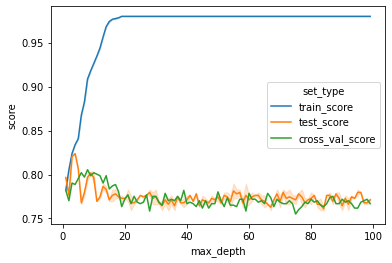

In [81]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [67]:
from sklearn.model_selection import cross_val_score

In [90]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [91]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7966101694915254

In [94]:
from sklearn.model_selection import GridSearchCV

In [96]:
clf = tree.DecisionTreeClassifier()

In [106]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth' : range(1, 30)}

In [107]:
gridsearchcv_clf = GridSearchCV(clf, parametrs, cv=5)

In [108]:
gridsearchcv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [110]:
gridsearchcv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [111]:
best_clf = gridsearchcv_clf.best_estimator_

In [112]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [116]:
best_clf.score(X_test, y_test)

0.7728813559322034

In [117]:
y_pred = best_clf.predict(X_test)

In [114]:
from sklearn.metrics import precision_score

In [118]:
precision_score(y_test, y_pred)

0.7789473684210526

In [119]:
from sklearn.metrics import recall_score

In [120]:
recall_score(y_test, y_pred)

0.6166666666666667

In [121]:
y_pred_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

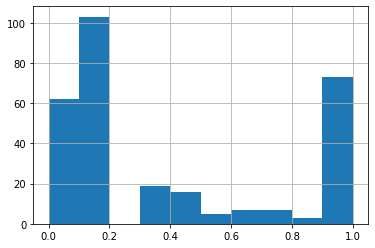

In [124]:
pd.Series(y_pred_prob[:, 1]).hist()

In [127]:
y_pred_new = np.where(y_pred_prob[:, 1] > 0.4, 1, 0)

In [128]:
precision_score(y_test, y_pred_new)

0.7837837837837838

In [129]:
recall_score(y_test, y_pred_new)

0.725

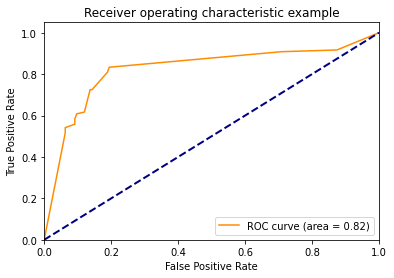

In [134]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()